In [1]:
import sys, os
sys.path.append(os.path.abspath(
    os.getcwd()+"/core")
)

In [20]:
from core.neural_network import load_params
from core.quantum_error_correction_code import deformation_cmap, SurfaceCode

import matplotlib.pyplot as plt
import jax.numpy as jnp

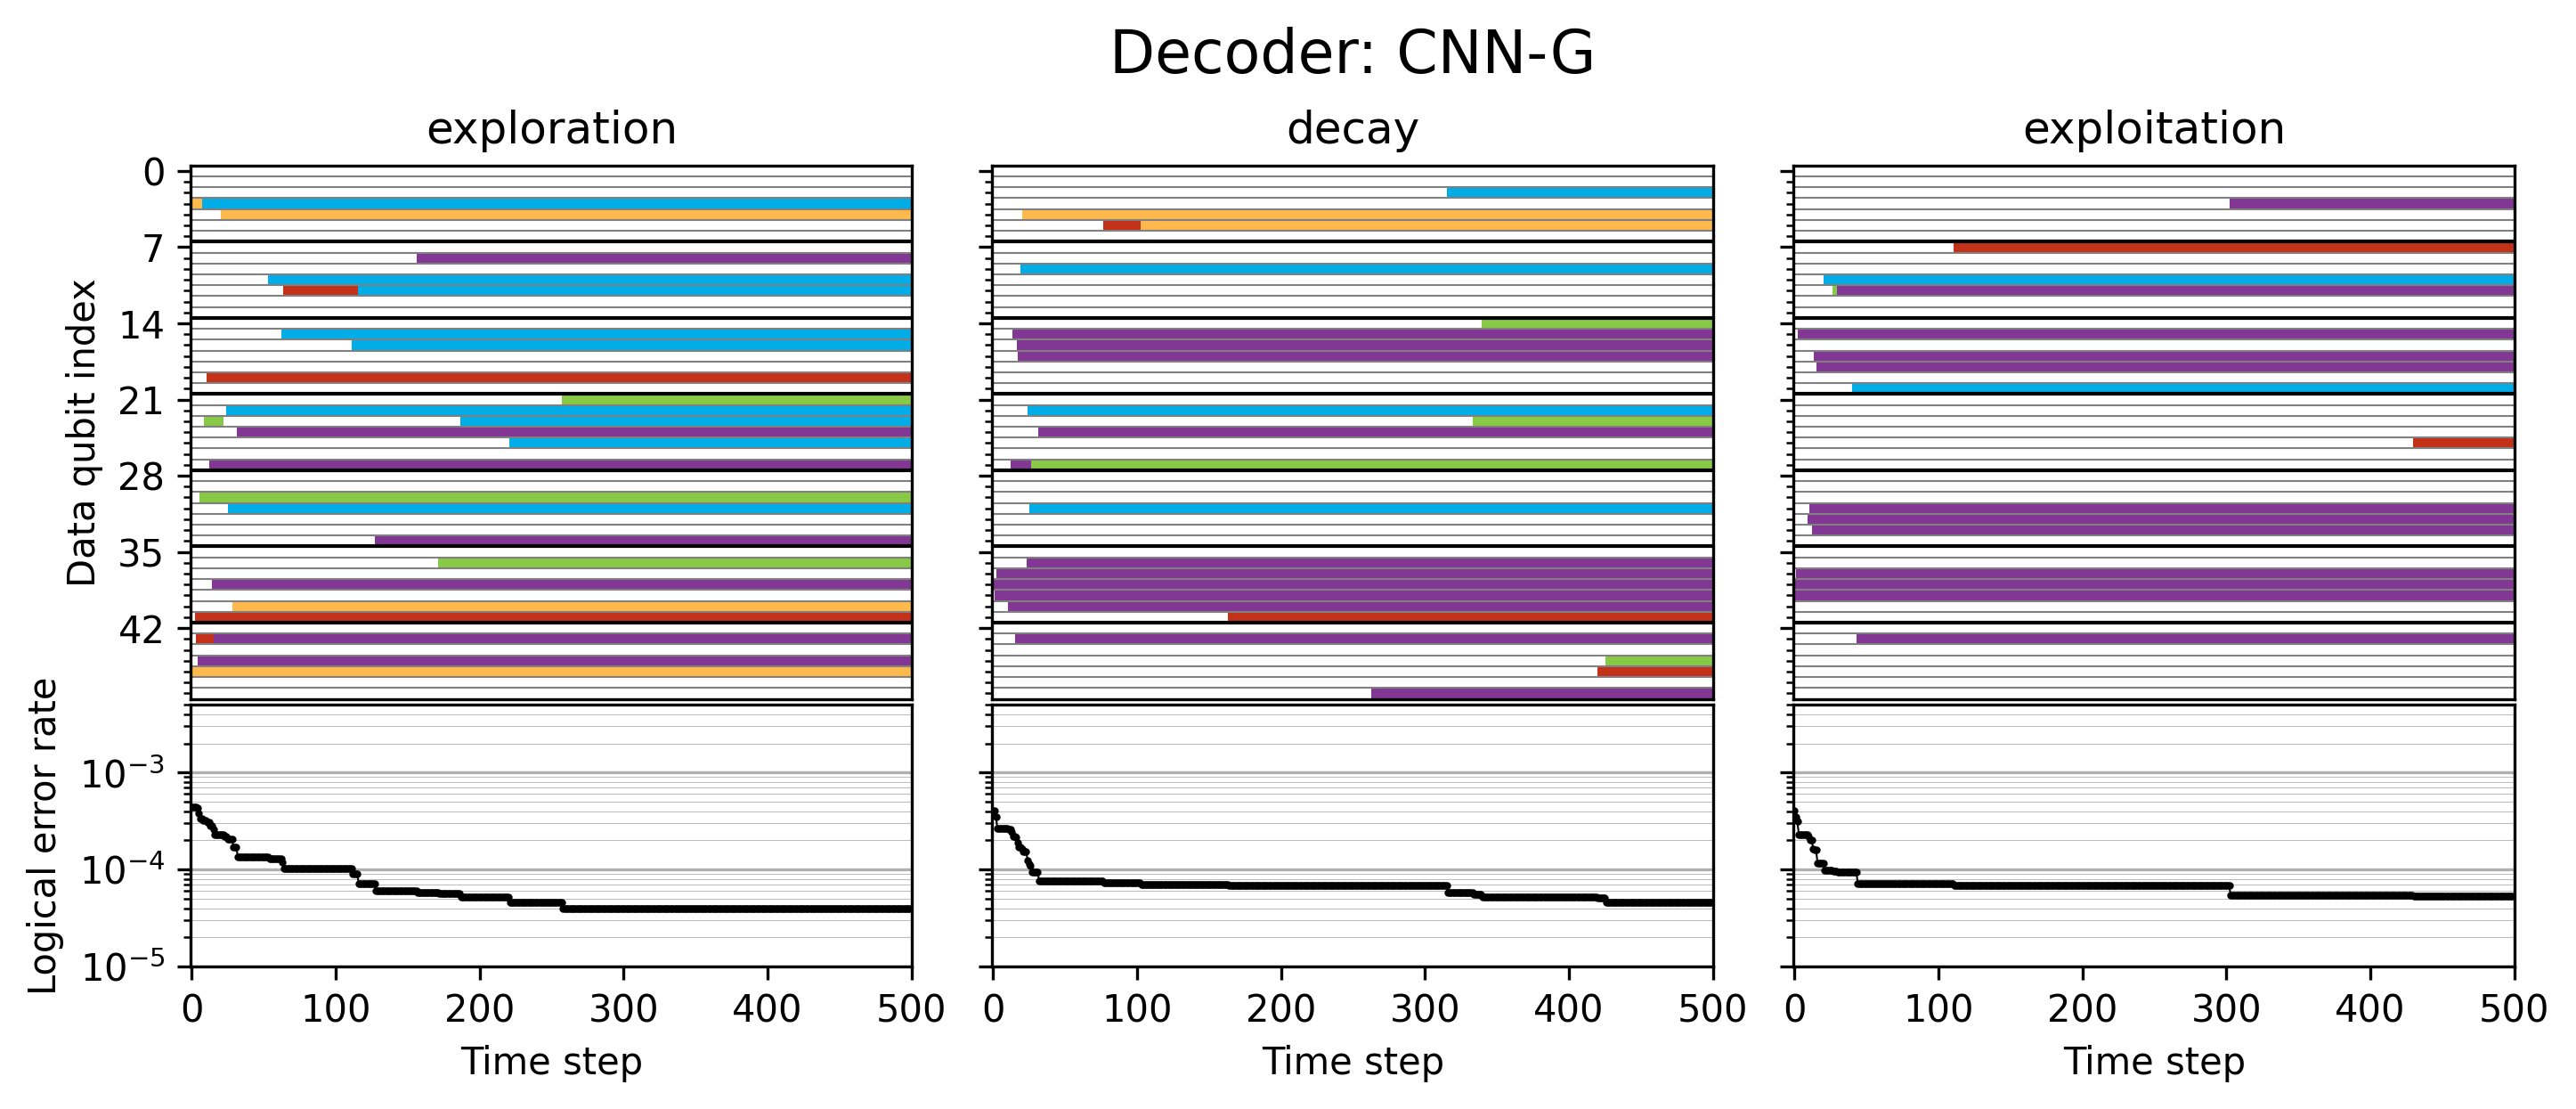

In [3]:
CODE_DISTANCE = 7
ENVIRONMENT_TYPE = "CNN-G"

scaling_names = ["exploration", "decay", "exploitation"]

fig = plt.figure(dpi=300, figsize=(3,2))

xlim = (-.5, 500+.5)
ylim = (1E-5, 5E-3)

for i, scaling_name in enumerate(scaling_names):
    settings, model_params = load_params(f"data/RL-{ENVIRONMENT_TYPE}-{CODE_DISTANCE}-{scaling_name}.json")

    scores = settings["scores"]
    deformations = settings["deformations"]
    dones = settings["dones"]

    error_rates: jnp.ndarray = -jnp.log(.99) / scores[:1+int(xlim[-1]-.5)]
    # error_rates: jnp.ndarray = -jnp.log(.99) / scores#[~dones]

    width = .9
    ax1 = fig.add_axes((i,0,width,1))
    ax2 = fig.add_axes((i,-.5,width,.49))

    ax1.set_title(scaling_name)

    im_aspect = error_rates.shape[0] / deformations.shape[1]
    fig_aspect = fig.get_figheight() / fig.get_figwidth() / width

    im = ax1.imshow(deformations[:error_rates.shape[0]].T, aspect=im_aspect*fig_aspect, interpolation="nearest", cmap=deformation_cmap, vmin=-.5, vmax=5.5)
    ax1.set_xlim(*xlim)
    ax1.set_xticks([])
    ax1.set_yticks(jnp.arange(0, deformations.shape[1], CODE_DISTANCE))
    ax1.set_yticks(jnp.arange(0, deformations.shape[1]), minor=True)
    ax1.set_yticklabels(jnp.arange(0, deformations.shape[1], CODE_DISTANCE))
    ax1.hlines(jnp.arange(CODE_DISTANCE**2)[1:]-.5, [-1]*(CODE_DISTANCE**2-1), [error_rates.shape[0]]*(CODE_DISTANCE**2-1), color='gray', lw=.5)
    ax1.hlines(CODE_DISTANCE*jnp.arange(CODE_DISTANCE)[1:]-.5, [-1]*(CODE_DISTANCE-1), [error_rates.shape[0]]*(CODE_DISTANCE-1), color='k', lw=1)
    ax1.fill_between(
        range(len(dones)), 
        -0.5, 
        deformations.shape[1] - 0.5, 
        where=dones, 
        color='gray', 
        alpha=0.5, 
        step='mid'
    )

    ax2.plot(range(error_rates.shape[0]), error_rates, '.-k', lw=.5, ms=2)
    ax2.set_xticks(jnp.arange(0, 550, 100))
    ax2.set_xlim(-.5, error_rates.shape[0]+.5)
    ax2.set_yscale('log')
    ax2.set_ylim(*ylim)
    ax2.set_xlim(*xlim)
    ax2.grid(which='major', axis='y')
    ax2.grid(which='minor', lw=.2)
    ax2.set_xlabel("Time step")

    if i != 0:
        ax1.set_yticklabels([], minor=False)
        ax1.set_yticklabels([], minor=True)
        ax2.set_yticklabels([], minor=False)
        ax2.set_yticklabels([], minor=True)
    else:
        ax1.set_ylabel("Data qubit index")
        ax2.set_ylabel("Logical error rate")
    
    if i == 1:
        ax1.annotate(
            f"Decoder: {ENVIRONMENT_TYPE}",
            xy=(.5, 1.15),
            xycoords="axes fraction",
            ha="center",
            va="bottom",
            fontsize=16,
        )

plt.savefig(f"figs/RL-Progress-{ENVIRONMENT_TYPE}-{CODE_DISTANCE}.eps", bbox_inches='tight', dpi=300)
plt.savefig(f"figs/RL-Progress-{ENVIRONMENT_TYPE}-{CODE_DISTANCE}.pdf", bbox_inches='tight', dpi=300)
plt.savefig(f"figs/RL-Progress-{ENVIRONMENT_TYPE}-{CODE_DISTANCE}.png", bbox_inches='tight', dpi=300)

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


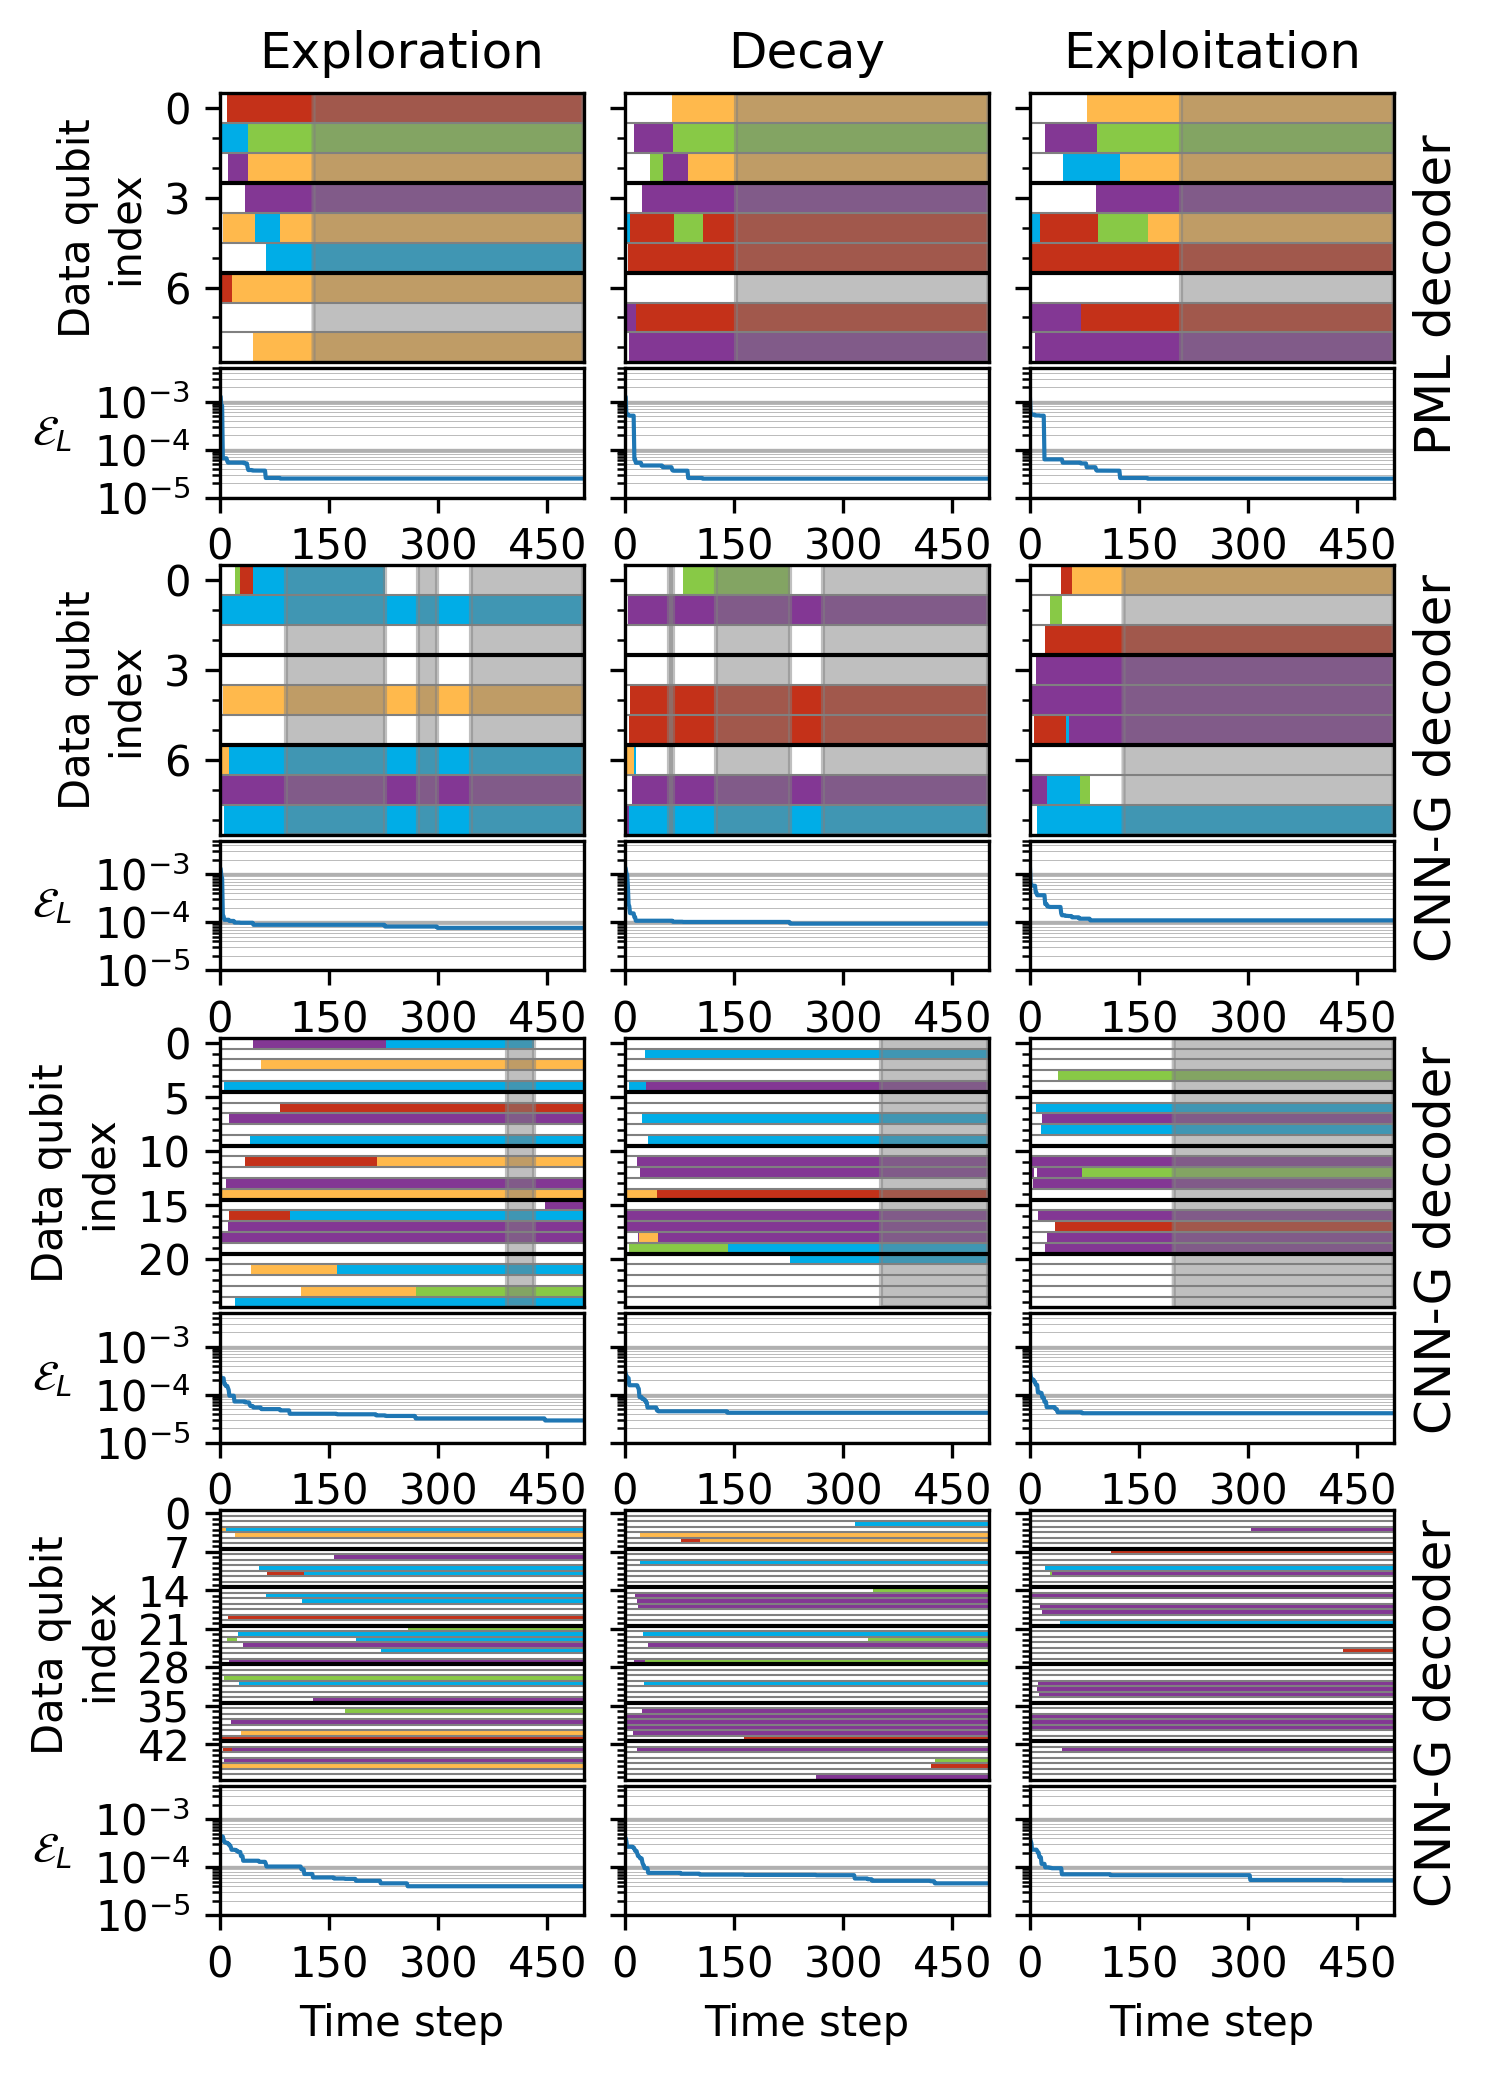

In [31]:
scaling_names = ["exploration", "decay", "exploitation"]
file_names = [("PML", 3), ("CNN-G", 3), ("CNN-G", 5), ("CNN-G", 7)]

fig = plt.figure(dpi=300, figsize=(1.35,0.9))

xlim = (-.5, 500+.5)
ylim = (1E-5, 5E-3)

for j, (decoder, code_distance) in enumerate(file_names):
    for i, scaling_name in enumerate(scaling_names):
        settings, model_params = load_params(f"data/RL-{decoder}-{code_distance}-{scaling_name}.json")

        scores = settings["scores"]
        deformations = settings["deformations"]
        dones = settings["dones"]

        error_rates: jnp.ndarray = -jnp.log(.99) / scores[:1+int(xlim[-1]-.5)]
        # error_rates: jnp.ndarray = -jnp.log(.99) / scores#[~dones]

        width = .9
        ax1 = fig.add_axes((i,-1.75*j,width,1))
        ax2 = fig.add_axes((i,-.5 - 1.75*j,width,.48))

        if j == 0:
            ax1.set_title(scaling_name.capitalize())

        im_aspect = error_rates.shape[0] / deformations.shape[1]
        fig_aspect = fig.get_figheight() / fig.get_figwidth() / width

        im = ax1.imshow(deformations[:error_rates.shape[0]].T, aspect=im_aspect*fig_aspect, interpolation="nearest", cmap=deformation_cmap, vmin=-.5, vmax=5.5)
        ax1.set_xlim(*xlim)
        ax1.set_xticks([])
        ax1.set_yticks(jnp.arange(0, deformations.shape[1], code_distance))
        ax1.set_yticks(jnp.arange(0, deformations.shape[1]), minor=True)
        ax1.set_yticklabels(jnp.arange(0, deformations.shape[1], code_distance))
        ax1.hlines(jnp.arange(code_distance**2)[1:]-.5, [-1]*(code_distance**2-1), [error_rates.shape[0]]*(code_distance**2-1), color='gray', lw=.5)
        ax1.hlines(code_distance*jnp.arange(code_distance)[1:]-.5, [-1]*(code_distance-1), [error_rates.shape[0]]*(code_distance-1), color='k', lw=1)
        ax1.fill_between(
            range(len(dones)), 
            -0.5, 
            deformations.shape[1] - 0.5, 
            where=dones, 
            color='gray', 
            alpha=0.5, 
            step='mid'
        )

        ax2.plot(range(error_rates.shape[0]), error_rates, '-', lw=1)
        ax2.set_xticks(jnp.arange(0, 550, 150))
        ax2.set_xlim(-.5, error_rates.shape[0]+.5)
        ax2.set_yscale('log')
        ax2.set_ylim(*ylim)
        ax2.set_xlim(*xlim)
        ax2.grid(which='major', axis='y')
        ax2.grid(which='minor', lw=.2)
        # ax2.fill_between(
        #     range(len(dones)), 
        #     -0.5, 
        #     deformations.shape[1] - 0.5, 
        #     where=dones, 
        #     color='gray', 
        #     alpha=0.5, 
        #     step='mid'
        # )

        if i != 0:
            ax1.set_yticklabels([], minor=False)
            ax1.set_yticklabels([], minor=True)
            ax2.set_yticklabels([], minor=False)
            ax2.set_yticklabels([], minor=True)
        else:
            ax1.set_ylabel("Data qubit\nindex")
            ax2.set_ylabel("$\\mathcal{E}_L$", rotation=0, labelpad=10, ha='center', va='center')
        if i == len(scaling_names)-1:
            ax1.annotate(
                f"{decoder} decoder",
                xy=(1.05, 0.25),
                xycoords='axes fraction',
                ha='left',
                va='center',
                fontsize=12,
                rotation=90
            )
        
        if j == len(file_names)-1:
            ax2.set_xlabel("Time step")
        # else:
        #     ax2.set_xticklabels([])

plt.savefig(f"figs/RL-Progress-combined.eps", bbox_inches='tight', dpi=300)
plt.savefig(f"figs/RL-Progress-combined.pdf", bbox_inches='tight', dpi=300)
plt.savefig(f"figs/RL-Progress-combined.png", bbox_inches='tight', dpi=300)

plt.show()

In [29]:
scaling_names = ["exploration", "decay", "exploitation"]
file_names = [("PML", 3), ("CNN-G", 3), ("CNN-G", 5), ("CNN-G", 7)]

fig = plt.figure(dpi=300, figsize=(1.4,1.0))

xlim = (-.5, 500+.5)
ylim = (1E-5, 5E-3)

for j, (decoder, code_distance) in enumerate(file_names):
    code = SurfaceCode(code_distance)
    for i, scaling_name in enumerate(scaling_names):
        settings, model_params = load_params(f"data/RL-{decoder}-{code_distance}-{scaling_name}.json")
        display(f"data/RL-{decoder}-{code_distance}-{scaling_name}.json")

        deformation = settings["deformations"][-1]
        parity_information = code.deformation_parity_info(deformation)
        print(
            code.show_latex_code(parity_information, deformation)
        )

'data/RL-PML-3-exploration.json'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (0,0) -- (0,2) -- (-1,1) -- cycle;
\filldraw[fill=black!5, draw=none] (4,2) -- (4,4) -- (5,3) -- cycle;
\filldraw[fill=black!10, draw=none] (2,0) -- (4,0) -- (3,-1) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (1,5) -- cycle;

% Draw the data qubits
\node[draw, circle, fill=BrickRed, line width=.5mm, minimum size=5mm] (D0) at (0.0,0.0) {};
\node[draw, circle, fill=LimeGreen, line width=.5mm, minimum size=5mm] (D1) at (2.0,0.0) {};
\node[draw, circle, fill=Dandelion, line width=.5mm, minimum size=5mm] (D2) at (4.0,0.0) {};
\node[draw, circle, fill=Fuchsia, line width=.5mm, minimum size=5mm] (D3) at (0.0,

'data/RL-PML-3-decay.json'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (0,0) -- (0,2) -- (-1,1) -- cycle;
\filldraw[fill=black!5, draw=none] (4,2) -- (4,4) -- (5,3) -- cycle;
\filldraw[fill=black!10, draw=none] (2,0) -- (4,0) -- (3,-1) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (1,5) -- cycle;

% Draw the data qubits
\node[draw, circle, fill=Dandelion, line width=.5mm, minimum size=5mm] (D0) at (0.0,0.0) {};
\node[draw, circle, fill=LimeGreen, line width=.5mm, minimum size=5mm] (D1) at (2.0,0.0) {};
\node[draw, circle, fill=Dandelion, line width=.5mm, minimum size=5mm] (D2) at (4.0,0.0) {};
\node[draw, circle, fill=Fuchsia, line width=.5mm, minimum size=5mm] (D3) at (0.0

'data/RL-PML-3-exploitation.json'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (0,0) -- (0,2) -- (-1,1) -- cycle;
\filldraw[fill=black!5, draw=none] (4,2) -- (4,4) -- (5,3) -- cycle;
\filldraw[fill=black!10, draw=none] (2,0) -- (4,0) -- (3,-1) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (1,5) -- cycle;

% Draw the data qubits
\node[draw, circle, fill=Dandelion, line width=.5mm, minimum size=5mm] (D0) at (0.0,0.0) {};
\node[draw, circle, fill=LimeGreen, line width=.5mm, minimum size=5mm] (D1) at (2.0,0.0) {};
\node[draw, circle, fill=Dandelion, line width=.5mm, minimum size=5mm] (D2) at (4.0,0.0) {};
\node[draw, circle, fill=Fuchsia, line width=.5mm, minimum size=5mm] (D3) at (0.0

'data/RL-CNN-G-3-exploration.json'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (0,0) -- (0,2) -- (-1,1) -- cycle;
\filldraw[fill=black!5, draw=none] (4,2) -- (4,4) -- (5,3) -- cycle;
\filldraw[fill=black!10, draw=none] (2,0) -- (4,0) -- (3,-1) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (1,5) -- cycle;

% Draw the data qubits
\node[draw, circle, fill=White, line width=.5mm, minimum size=5mm] (D0) at (0.0,0.0) {};
\node[draw, circle, fill=Cerulean, line width=.5mm, minimum size=5mm] (D1) at (2.0,0.0) {};
\node[draw, circle, fill=White, line width=.5mm, minimum size=5mm] (D2) at (4.0,0.0) {};
\node[draw, circle, fill=White, line width=.5mm, minimum size=5mm] (D3) at (0.0,2.0) {};
\

'data/RL-CNN-G-3-decay.json'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (0,0) -- (0,2) -- (-1,1) -- cycle;
\filldraw[fill=black!5, draw=none] (4,2) -- (4,4) -- (5,3) -- cycle;
\filldraw[fill=black!10, draw=none] (2,0) -- (4,0) -- (3,-1) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (1,5) -- cycle;

% Draw the data qubits
\node[draw, circle, fill=White, line width=.5mm, minimum size=5mm] (D0) at (0.0,0.0) {};
\node[draw, circle, fill=Fuchsia, line width=.5mm, minimum size=5mm] (D1) at (2.0,0.0) {};
\node[draw, circle, fill=White, line width=.5mm, minimum size=5mm] (D2) at (4.0,0.0) {};
\node[draw, circle, fill=White, line width=.5mm, minimum size=5mm] (D3) at (0.0,2.0) {};
\n

'data/RL-CNN-G-3-exploitation.json'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (0,0) -- (0,2) -- (-1,1) -- cycle;
\filldraw[fill=black!5, draw=none] (4,2) -- (4,4) -- (5,3) -- cycle;
\filldraw[fill=black!10, draw=none] (2,0) -- (4,0) -- (3,-1) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (1,5) -- cycle;

% Draw the data qubits
\node[draw, circle, fill=Dandelion, line width=.5mm, minimum size=5mm] (D0) at (0.0,0.0) {};
\node[draw, circle, fill=White, line width=.5mm, minimum size=5mm] (D1) at (2.0,0.0) {};
\node[draw, circle, fill=BrickRed, line width=.5mm, minimum size=5mm] (D2) at (4.0,0.0) {};
\node[draw, circle, fill=Fuchsia, line width=.5mm, minimum size=5mm] (D3) at (0.0,2.0)

'data/RL-CNN-G-5-exploration.json'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (2,6) -- (0,6) -- cycle;
\filldraw[fill=black!5, draw=none] (0,6) -- (2,6) -- (2,8) -- (0,8) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,4) -- (4,4) -- (4,6) -- (2,6) -- cycle;
\filldraw[fill=black!10, draw=none] (2,6) -- (4,6) -- (4,8) -- (2,8) -- cycle;
\filldraw[fill=black!10, draw=none] (4,0) -- (6,0) -- (6,2) -- (4,2) -- cycle;
\filldraw[fill=black!5, draw=none] (4,2) -- (6,2) -- (6,4) -- (4,4) -- cycle;
\filldraw[fill=black!10, draw=none] (4,4) -- (6,4) -- (6,6) -- (4,6) -- cycle;
\filldraw[fill=black!5, draw=none] (4,6) -- (6,6) -- (6,8) -- (4,8) -- cycle;
\filldraw[fill=black!5, draw=none] (

'data/RL-CNN-G-5-decay.json'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (2,6) -- (0,6) -- cycle;
\filldraw[fill=black!5, draw=none] (0,6) -- (2,6) -- (2,8) -- (0,8) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,4) -- (4,4) -- (4,6) -- (2,6) -- cycle;
\filldraw[fill=black!10, draw=none] (2,6) -- (4,6) -- (4,8) -- (2,8) -- cycle;
\filldraw[fill=black!10, draw=none] (4,0) -- (6,0) -- (6,2) -- (4,2) -- cycle;
\filldraw[fill=black!5, draw=none] (4,2) -- (6,2) -- (6,4) -- (4,4) -- cycle;
\filldraw[fill=black!10, draw=none] (4,4) -- (6,4) -- (6,6) -- (4,6) -- cycle;
\filldraw[fill=black!5, draw=none] (4,6) -- (6,6) -- (6,8) -- (4,8) -- cycle;
\filldraw[fill=black!5, draw=none] (

'data/RL-CNN-G-5-exploitation.json'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (2,6) -- (0,6) -- cycle;
\filldraw[fill=black!5, draw=none] (0,6) -- (2,6) -- (2,8) -- (0,8) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,4) -- (4,4) -- (4,6) -- (2,6) -- cycle;
\filldraw[fill=black!10, draw=none] (2,6) -- (4,6) -- (4,8) -- (2,8) -- cycle;
\filldraw[fill=black!10, draw=none] (4,0) -- (6,0) -- (6,2) -- (4,2) -- cycle;
\filldraw[fill=black!5, draw=none] (4,2) -- (6,2) -- (6,4) -- (4,4) -- cycle;
\filldraw[fill=black!10, draw=none] (4,4) -- (6,4) -- (6,6) -- (4,6) -- cycle;
\filldraw[fill=black!5, draw=none] (4,6) -- (6,6) -- (6,8) -- (4,8) -- cycle;
\filldraw[fill=black!5, draw=none] (

'data/RL-CNN-G-7-exploration.json'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (2,6) -- (0,6) -- cycle;
\filldraw[fill=black!5, draw=none] (0,6) -- (2,6) -- (2,8) -- (0,8) -- cycle;
\filldraw[fill=black!10, draw=none] (0,8) -- (2,8) -- (2,10) -- (0,10) -- cycle;
\filldraw[fill=black!5, draw=none] (0,10) -- (2,10) -- (2,12) -- (0,12) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,4) -- (4,4) -- (4,6) -- (2,6) -- cycle;
\filldraw[fill=black!10, draw=none] (2,6) -- (4,6) -- (4,8) -- (2,8) -- cycle;
\filldraw[fill=black!5, draw=none] (2,8) -- (4,8) -- (4,10) -- (2,10) -- cycle;
\filldraw[fill=black!10, draw=none] (2,10) -- (4,10) -- (4,12) -- (2,12) -- cycle;
\filldraw[fill=black!10,

'data/RL-CNN-G-7-decay.json'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (2,6) -- (0,6) -- cycle;
\filldraw[fill=black!5, draw=none] (0,6) -- (2,6) -- (2,8) -- (0,8) -- cycle;
\filldraw[fill=black!10, draw=none] (0,8) -- (2,8) -- (2,10) -- (0,10) -- cycle;
\filldraw[fill=black!5, draw=none] (0,10) -- (2,10) -- (2,12) -- (0,12) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,4) -- (4,4) -- (4,6) -- (2,6) -- cycle;
\filldraw[fill=black!10, draw=none] (2,6) -- (4,6) -- (4,8) -- (2,8) -- cycle;
\filldraw[fill=black!5, draw=none] (2,8) -- (4,8) -- (4,10) -- (2,10) -- cycle;
\filldraw[fill=black!10, draw=none] (2,10) -- (4,10) -- (4,12) -- (2,12) -- cycle;
\filldraw[fill=black!10,

'data/RL-CNN-G-7-exploitation.json'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (2,6) -- (0,6) -- cycle;
\filldraw[fill=black!5, draw=none] (0,6) -- (2,6) -- (2,8) -- (0,8) -- cycle;
\filldraw[fill=black!10, draw=none] (0,8) -- (2,8) -- (2,10) -- (0,10) -- cycle;
\filldraw[fill=black!5, draw=none] (0,10) -- (2,10) -- (2,12) -- (0,12) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,4) -- (4,4) -- (4,6) -- (2,6) -- cycle;
\filldraw[fill=black!10, draw=none] (2,6) -- (4,6) -- (4,8) -- (2,8) -- cycle;
\filldraw[fill=black!5, draw=none] (2,8) -- (4,8) -- (4,10) -- (2,10) -- cycle;
\filldraw[fill=black!10, draw=none] (2,10) -- (4,10) -- (4,12) -- (2,12) -- cycle;
\filldraw[fill=black!10,

<Figure size 420x300 with 0 Axes>